In [1]:
#Include necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
% matplotlib inline

In [2]:
#REading the dataset

YellowCabJuneData = pd.read_csv("yellow_tripdata_2017-06.csv")

In [3]:
YellowCabJuneData.shape

(9656993, 17)

In [4]:
YellowCabJuneData.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

In [5]:
#Steps before processding
"""
1) Data Exploration - Distribution of categorical variables, Day/Week/Weekday trip distribution
2) Data Exploration - Range of Numerical variables, Outline any outliers based on the dataset
3) Collect basic statistics; count, count distribution, hottest areas, tips based on area, time of the day, day of the week,

"""

'\n1) Data Exploration - Distribution of categorical variables, Day/Week/Weekday trip distribution\n2) Data Exploration - Range of Numerical variables, Outline any outliers based on the dataset\n3) Collect basic statistics; count, count distribution, hottest areas, tips based on area, time of the day, day of the week,\n\n'

In [7]:
# check datatypes of each variable

YellowCabJuneData.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [8]:
# check statistics of the features

YellowCabJuneData.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06
mean,1.546961e+00,1.623943e+00,2.978617e+00,1.045527e+00,1.626235e+02,1.607379e+02,1.334040e+00,1.328727e+01,3.413314e-01,4.972247e-01,1.878480e+00,3.376697e-01,2.996046e-01,1.664632e+01
std,4.977898e-01,1.264608e+00,5.704095e+00,5.665036e-01,6.675223e+01,7.047343e+01,4.929622e-01,2.151675e+02,4.623294e-01,7.625157e-02,2.696221e+00,2.022799e+00,1.441594e-02,2.153387e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.500000e+02,-5.056000e+01,-5.000000e-01,-7.400000e+01,-1.250000e+01,-3.000000e-01,-5.503000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.185000e+01
75%,2.000000e+00,2.000000e+00,3.100000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.817000e+01
max,2.000000e+00,9.000000e+00,9.496980e+03,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,6.304618e+05,2.250000e+01,1.400000e+02,4.440000e+02,9.900000e+02,1.000000e+00,6.304631e+05


# Data Cleaning

In [9]:
"""
Few things to notice about the dataset:
1) Vendor ID does not give important information related to the problem statement
2) Min and Max passenger counts are 0 and 9 respectively
3) Min trip distance is 0; we need to remove the records having trip distance = 0
4) Max Rate Code ID is 99 which is not in the data dictionary. We need to check the other invalid values present in the Rate
   Code ID. 
5) There are some negative fare amount; we need to remove the records having fare amount < 0
6) There are some negative extra charges; we need to remove the records having invalid extra charges.
7) There are some negative MTA_tax charges; we need to remove the records having invalid MTA_tax charges.
8) There are some negative tip amount; we need to remove the records having invalid tip amount.
9) There are some negative tolls amount; we need to remove the records having invalid tolls amount.
10) There are some invalid values for improvement surcharges; we need to remove the records having invalid improvement
    surcharges.
11) There are some negative values for total amount; we need to remove the records having invalid total amounts.

"""

'\nFew things to notice about the dataset:\n1) Vendor ID does not give important information related to the problem statement\n2) Min and Max passenger counts are 0 and 9 respectively\n3) Min trip distance is 0; we need to remove the records having trip distance = 0\n4) Max Rate Code ID is 99 which is not in the data dictionary. We need to check the other invalid values present in the Rate\n   Code ID. \n5) There are some negative fare amount; we need to remove the records having fare amount < 0\n6) There are some negative extra charges; we need to remove the records having invalid extra charges.\n7) There are some negative MTA_tax charges; we need to remove the records having invalid MTA_tax charges.\n8) There are some negative tip amount; we need to remove the records having invalid tip amount.\n9) There are some negative tolls amount; we need to remove the records having invalid tolls amount.\n10) There are some invalid values for improvement surcharges; we need to remove the record

In [ ]:
#From the above observations/comments, clean the dataset removing outliers and invalid values

#************Passenger Count***************

#Lets check the frequency of different passenger count

#YellowCabJuneData.passenger_count.value_counts()

# There are 548 records with 0 passenger's, will remove the records where count==0

In [ ]:
#************Trip Distance***************

#Lets check the frequency of different passenger count

#YellowCabJuneData[YellowCabJuneData.trip_distance == 0.0].trip_distance.value_counts()

# There are 548 records with 0 passenger's, will remove the records where count==0

In [ ]:
#************Ratecode ID***************

#Lets check the frequency of different RateCode ID

#YellowCabJuneDataFiltered.RatecodeID.value_counts()

# There are 548 records with 0 passenger's, will remove the records where count==0

In [10]:
#Data Cleaning

YellowCabJuneDataFiltered = YellowCabJuneData[YellowCabJuneData.passenger_count != 0]

YellowCabJuneDataFiltered = YellowCabJuneDataFiltered[YellowCabJuneDataFiltered.trip_distance > 0]

YellowCabJuneDataFiltered = YellowCabJuneDataFiltered[(YellowCabJuneDataFiltered.RatecodeID >= 1) & 
                                                      (YellowCabJuneDataFiltered.RatecodeID <=6)]

YellowCabJuneDataFiltered = YellowCabJuneDataFiltered[YellowCabJuneDataFiltered.fare_amount >= 0]

YellowCabJuneDataFiltered = YellowCabJuneDataFiltered[(YellowCabJuneDataFiltered.extra == 0.0) |
                                                     (YellowCabJuneDataFiltered.extra == 0.5) |
                                                     (YellowCabJuneDataFiltered.extra == 1.0)]

YellowCabJuneDataFiltered = YellowCabJuneDataFiltered[(YellowCabJuneDataFiltered.mta_tax == 0.00) |
                                                     (YellowCabJuneDataFiltered.mta_tax == 0.50)]

YellowCabJuneDataFiltered = YellowCabJuneDataFiltered[YellowCabJuneDataFiltered.tip_amount >= 0]

YellowCabJuneDataFiltered = YellowCabJuneDataFiltered[YellowCabJuneDataFiltered.tolls_amount >= 0]

YellowCabJuneDataFiltered = YellowCabJuneDataFiltered[YellowCabJuneDataFiltered.total_amount >= 0]

In [11]:
YellowCabJuneDataFiltered.shape

(9547617, 17)

# Feature Engineering

In [13]:
YellowCabJuneDataFiltered.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,7.5,1.0,0.5,1.86,0.0,0.3,11.16
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,6.0,1.0,0.5,2.34,0.0,0.3,10.14


In [14]:
#Creating Time and Weekday variables.

YellowCabJuneDataFiltered['PickupWeekDay'] = YellowCabJuneDataFiltered.tpep_pickup_datetime.apply(lambda t: 
                                                      datetime.strptime(t, '%Y-%m-%d %H:%M:%S').weekday())
YellowCabJuneDataFiltered['PickupHour'] = YellowCabJuneDataFiltered.tpep_pickup_datetime.apply(lambda t: 
                                                      datetime.strptime(t, '%Y-%m-%d %H:%M:%S').hour)

YellowCabJuneDataFiltered['DropoffWeekDay'] = YellowCabJuneDataFiltered.tpep_dropoff_datetime.apply(lambda t: 
                                                      datetime.strptime(t, '%Y-%m-%d %H:%M:%S').weekday())
YellowCabJuneDataFiltered['DropoffHour'] = YellowCabJuneDataFiltered.tpep_dropoff_datetime.apply(lambda t: 
                                                      datetime.strptime(t, '%Y-%m-%d %H:%M:%S').hour)


#Creating a variable on route by combining PickUp and DropOff location ID.

YellowCabJuneDataFiltered['Route'] = [str(x) + "_" + str(y) for x,y in zip(YellowCabJuneDataFiltered.PULocationID, 
                                                                         YellowCabJuneDataFiltered.DOLocationID)]

In [15]:
YellowCabJuneDataFiltered.columns

#Monday=0, Sunday=6

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'PickupWeekDay', 'PickupHour', 'DropoffWeekDay',
       'DropoffHour', 'Route'],
      dtype='object')

# Data Exploration

In [16]:
"""
Analyzing most number of trips by Week Day, Pickup Hour, Route, tip amount
"""

'\nAnalyzing most number of trips by Week Day, Pickup Hour, Route\n'

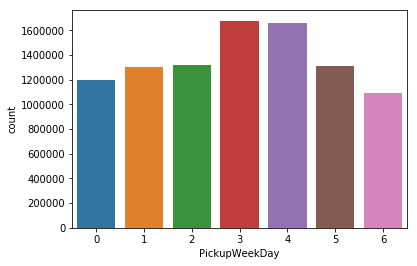

In [17]:
#Number of trips by Week Day

PickupWeekDay = sns.countplot(x="PickupWeekDay", data=YellowCabJuneDataFiltered[['PickupWeekDay']])

#Thursday and Friday have the most numbers of trips happen

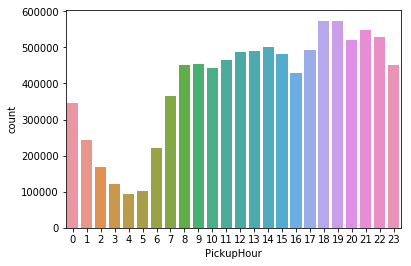

In [18]:
#Number of trips by Pickup Hour

PickupHour = sns.countplot(x="PickupHour", data=YellowCabJuneDataFiltered[['PickupHour']])

#Hour 18, 19, 21, 22 and 20 have the most number of trips in the day

In [19]:
#Number of trips by Pickup Location

YellowCabJuneDataFiltered.groupby('PULocationID').agg({'PULocationID': 'count'}).sort_values(by=['PULocationID'], 
                                                                                             ascending=False).head(5)

#Top 5 pickup locations are 237, 161, 236, 162 and 186 have the most number of trips

c:\users\swapnil\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'PULocationID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


,PULocationID
PULocationID,
237,378064
161,356561
236,341940
162,329360
186,326718


In [20]:
#Number of trips by Route

YellowCabJuneDataFiltered.groupby('Route').agg({'Route': 'count'}).sort_values(by=['Route'], ascending=False).head(10)

#Top 10 routes w.r.t the number of trips are 264_264, 237_236, 236_237, 236_236, 237_237, 239_142, 239_238, 237_162,
#237_161, 142_239

c:\users\swapnil\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'Route' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,Route
Route,
264_264,107208
237_236,52658
236_237,44214
236_236,42845
237_237,40004
239_142,25251
239_238,24962
237_162,24869
237_161,24220


In [21]:
#Highest avg. tip_amount via route

temp = YellowCabJuneDataFiltered.groupby('Route').agg({'Route': 'count', 'tip_amount':'mean'}).sort_values(
                                                                by=['tip_amount', 'Route'], ascending=False).head(10)

temp
#Top 10 routes w.r.t the tip amount are 117_223, 23_113, 242_168, 201_234, 145_12, 187_23, 113_5, 43_86,
#239_39, 67_1; But the number of trips on these routes are very minimal (1 or 2)

c:\users\swapnil\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'Route' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


,Route,tip_amount
Route,,
117_223,1,200.000000
23_113,1,120.000000
242_168,1,120.000000
201_234,1,92.000000
145_12,3,83.333333
187_23,1,83.000000
113_5,1,75.880000
43_86,1,75.240000
239_39,1,70.840000


In [ ]:
YellowCabJuneDataFiltered['PickUpDate'] = YellowCabJuneDataFiltered.tpep_pickup_datetime.apply(lambda t: 
                                                      datetime.strptime(t, '%Y-%m-%d %H:%M:%S').date())


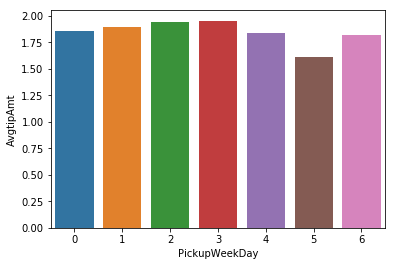

In [42]:
#Avg Tip Amount based on Week Day

temp = YellowCabJuneDataFiltered.groupby("PickupWeekDay").agg({"tpep_pickup_datetime": "count", 
                                                        "tip_amount":"sum", "PickupWeekDay":"first"})
temp['AvgtipAmt'] = temp['tip_amount']/temp['tpep_pickup_datetime']

PickupWeekDayTipAmt = sns.barplot(x="PickupWeekDay",y="AvgtipAmt", data=temp)

#Wednesday and Thrusday have the highest rate of Avg Tip

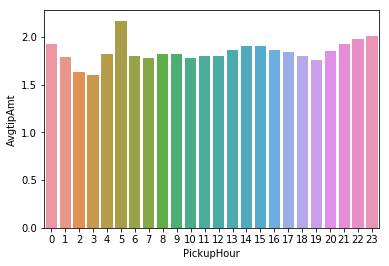

In [43]:
#Avg Tip Amount based on Hour of the day

temp = YellowCabJuneDataFiltered.groupby("PickupHour").agg({"tpep_pickup_datetime": "count", 
                                                        "tip_amount":"sum", "PickupHour":"first"})
temp['AvgtipAmt'] = temp['tip_amount']/temp['tpep_pickup_datetime']

PickupWeekDayTipAmt = sns.barplot(x="PickupHour",y="AvgtipAmt", data=temp)

#Hour 5, 21, 22, 23, and 0 has the highest amount of Avg Tip

In [75]:
#Avg Tip Amount based on the routes

temp = YellowCabJuneDataFiltered.groupby("Route").agg({"tpep_pickup_datetime": "count", 
                                                        "tip_amount":"sum", "Route":"first", "total_amount":"sum"})
temp['AvgtipAmt'] = temp['tip_amount']/temp['tpep_pickup_datetime']
temp['AvgtripAmt'] = temp['total_amount']/temp['tpep_pickup_datetime']


#Checking for a descent tip amount of 10% of Total amount and more than avg trips (more than 25000) on the route

temp[(temp.AvgtipAmt > temp.AvgtripAmt*.1) & (temp.tpep_pickup_datetime > 25000)].sort_values(by=['tpep_pickup_datetime'], 
                                                                                  ascending=False)

#Routes 264_264, 237_236, 236_237, 236_236, 237_237, 239_142 have a decent tip as well as number of trips 

,tpep_pickup_datetime,tip_amount,Route,total_amount,AvgtipAmt,AvgtripAmt
Route,,,,,,
264_264,107208,194746.14,264_264,1.725214e+06,1.816526,16.092209
237_236,52658,49905.37,237_236,4.435005e+05,0.947726,8.422282
236_237,44214,45548.57,236_237,4.067602e+05,1.030184,9.199806
236_236,42845,32050.06,236_236,2.935127e+05,0.748047,6.850571
237_237,40004,29948.37,237_237,2.891537e+05,0.748634,7.228119
239_142,25251,22459.85,239_142,1.977863e+05,0.889464,7.832809
